In [1]:
!pip install nlp
!pip install transformers -v 'transformers==4.49.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.2 MB/s eta 0:00:00
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)


In [2]:
!pip install tiktoken
!pip install deepseek_tokenizer
!pip install openai
!pip install -q -U accelerate
!pip install -q -U bitsandbytes
!pip install -q -U flash_attn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/

In [3]:
import nlp
import pandas as pd
import numpy as np
import random
import transformers
import seaborn as sns
import matplotlib.pyplot as plt

import tiktoken
from deepseek_tokenizer import ds_token
from transformers import AutoTokenizer
from google import genai
from google.genai import types
from google.colab import userdata
from transformers import LlamaTokenizerFast
import openai
from openai import OpenAI
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
from transformers import pipeline, BitsAndBytesConfig
import bitsandbytes as bnb
from tqdm import tqdm

In [4]:
# mount your own drive. I have everything set to my content/drive/My Drive/ISchool/MIDS/266/final_project/data
# so to just run this whole script, you need to have the same folders in your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
column_names = ['target','ides','date','flag','user','text']
df = pd.read_csv('/content/drive/My Drive/fp/training.1600000.processed.noemoticon.csv', encoding='latin-1', names=column_names)

In [6]:
df.head()

,target,ides,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

In [8]:
df.head()

,target,ides,date,flag,user,text,text_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",21


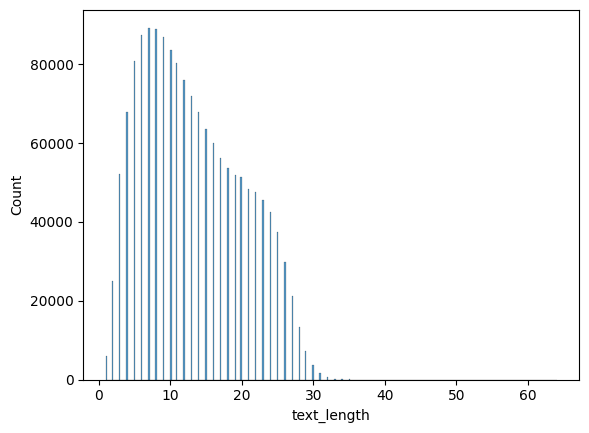

In [9]:
plt.figure()
sns.histplot(df['text_length'])
plt.show()

In [10]:
df_sampled = df.sample(n=270000, random_state=42).reset_index(drop=True)


In [11]:
batch_size = 90000
batch_1 = df_sampled.iloc[:batch_size].copy()
batch_2 = df_sampled.iloc[batch_size:2*batch_size].copy()
batch_3 = df_sampled.iloc[2*batch_size:].copy()


In [12]:
batch_1['llm'] = 'gpt'
batch_2['llm'] = 'deepseek'
batch_3['llm'] = 'llama'


LLAma

In [13]:
!pip install -q --upgrade bitsandbytes


In [14]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, pipeline
import torch
from google.colab import userdata

# Access your Hugging Face token
hf_token = userdata.get("HF_TOKEN")

model_name = "meta-llama/Meta-Llama-3.1-8B-Instruct"

# Set up quantization config for 4-bit loading
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name, token=hf_token)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    token=hf_token,
    device_map="auto",
    quantization_config=quant_config
)

# Create generation pipeline
llama_pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device_map="auto",
    torch_dtype=torch.float16
)


tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

Device set to use cuda:0


In [15]:
def paraphrase_with_llama(tweet_text):
    prompt = (
        f"Rewrite the following tweet using different words. Keep the same meaning and tone. "
        f"Do not include extra explanations, or any extra text. Just return the paraphrased tweet only.\n\n"
        f"Original tweet: {tweet_text}\n"
        f"Paraphrased tweet:"
    )

    output = llama_pipe(
        prompt,
        max_new_tokens=40,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        repetition_penalty=1.05,
        num_return_sequences=1
    )

    generated = output[0]['generated_text']
    response = generated.split("Paraphrased tweet:")[-1].strip()

    # Final cleanup: cut off any notes, hashtags, etc.
    response = response.split("Note:")[0]
    response = response.split("#")[0]
    response = response.split("<|")[0]
    return response.strip().strip('"')


In [16]:
tweet = "Why does Monday feel like it lasts 72 hours?"
print("Paraphrased:", paraphrase_with_llama(tweet))


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Paraphrased: Waking up


In [17]:
# Ensure batch_3 is reset and ordered
batch_3 = batch_3.reset_index(drop=True)

# Split into three chunks
chunk_1 = batch_3.iloc[:30000].copy()
chunk_2 = batch_3.iloc[30000:60000].copy()
chunk_3 = batch_3.iloc[60000:].copy()


In [18]:

import os
llama_dir = "/content/drive/My Drive/fp/paraphrased_llama"
os.makedirs(llama_dir, exist_ok=True)


In [19]:
test_chunk = chunk_1.iloc[:10].copy()

paraphrased_list = []

for i, row in tqdm(test_chunk.iterrows(), total=len(test_chunk), desc="Testing LLaMA"):
    try:
        paraphrased = paraphrase_with_llama(row['text'])
    except Exception as e:
        paraphrased = f"[ERROR] {str(e)}"
    paraphrased_list.append(paraphrased)

test_chunk['paraphrased'] = paraphrased_list

# Display original vs paraphrased
for i, row in test_chunk.iterrows():
    print(f"\n🔹 Original:    {row['text']}\n🔁 Paraphrased: {row['paraphrased']}")

# Optional: Save test output to Drive
test_chunk.to_csv("/content/drive/My Drive/266/paraphrased_llama_test_chunk.csv", index=False)
print("✅ Test chunk saved to Drive.")


Testing LLaMA:  30%|███       | 3/10 [00:19<00:45,  6.51s/it]


KeyboardInterrupt: 

In [20]:
import pandas as pd

# Load the old file
df = pd.read_csv("/content/drive/My Drive/fp/paraphrased_llama/paraphrased_llama_chunk1.csv")

# Keep only rows that are truly done
df_cleaned = df[df['paraphrased'].notnull() & ~df['paraphrased'].fillna("").str.startswith("[ERROR]")].copy()

# Save back the cleaned version (will likely be ~100 rows)
df_cleaned.to_csv("/content/drive/My Drive/fp/paraphrased_llama/paraphrased_llama_chunk1.csv", index=False)

print(f"✅ Cleaned and saved {len(df_cleaned)} completed rows.")


✅ Cleaned and saved 11087 completed rows.


In [21]:
def paraphrase_and_save(chunk_df, chunk_id, save_dir, save_every=100):
    import os
    import pandas as pd
    from tqdm import tqdm

    chunk_df = chunk_df.reset_index(drop=True)
    save_path = os.path.join(save_dir, f"paraphrased_llama_chunk{chunk_id}.csv")

    paraphrased_list = []

    # Load saved paraphrases if they exist
    if os.path.exists(save_path):
        saved_df = pd.read_csv(save_path)
        print(f"🔄 Found saved file with {len(saved_df)} rows.")

        # Copy existing paraphrases into chunk_df
        for i in range(min(len(saved_df), len(chunk_df))):
            if pd.notnull(saved_df.at[i, 'paraphrased']) and not str(saved_df.at[i, 'paraphrased']).startswith("[ERROR]"):
                chunk_df.at[i, 'paraphrased'] = saved_df.at[i, 'paraphrased']

        completed_mask = chunk_df['paraphrased'].notnull() & ~chunk_df['paraphrased'].fillna("").str.startswith("[ERROR]")
        start_idx = completed_mask.sum()
        paraphrased_list = chunk_df['paraphrased'].tolist()
        print(f"🔄 Resuming from row {start_idx}")
    else:
        start_idx = 0
        paraphrased_list = []
        print("🚀 Starting fresh")

    for i in tqdm(range(start_idx, len(chunk_df)), desc=f"Chunk {chunk_id}"):
        try:
            tweet = chunk_df.at[i, 'text']
            paraphrased = paraphrase_with_llama(tweet)
        except Exception as e:
            paraphrased = f"[ERROR] {str(e)}"
        paraphrased_list.append(paraphrased)
        chunk_df.at[i, 'paraphrased'] = paraphrased

        if (i + 1) % save_every == 0 or (i + 1) == len(chunk_df):
            chunk_df.to_csv(save_path, index=False)
            print(f"✅ Saved {i + 1} rows to {save_path}")

    print("🎉 Finished chunk", chunk_id)
    return chunk_df


In [22]:
result_chunk_1 = paraphrase_and_save(chunk_1, chunk_id=1, save_dir=llama_dir)


Output hidden; open in https://colab.research.google.com to view.